# <center> Crop Yield Prediction — Baseline Modeling </center>

- Author: Denish Trada
- Date: 25th May, 2025

##  Table of Contents

- [1. Introduction & Modeling Objective](#intro)
- [2. Project Framework: CRISP-DM Modeling Phase](#framework)
- [3. Load Cleaned Dataset](#load)
- [4. Define Feature Set and Target Variable](#features)
- [5. Train-Test Split](#split)
- [6. Baseline Model Training](#baseline)
  - [6.1 Linear Regression](#linreg)
  - [6.2 Decision Tree Regressor](#dtree)
  - [6.3 Random Forest Regressor](#rf)
- [7. Performance Evaluation](#evaluate)
- [8. Cross-Validation (5-Fold)](#cv)
- [9. Residual Analysis](#residuals)
- [10. Model Comparison Summary Table](#compare)
- [11. Feature Importance (Tree-Based Models)](#importance)
- [12. Final Commentary: Modeling Insights & Business Implications](#final)


<a id="intro"></a>
## 1. Introduction & Modeling Objective

###  Introduction

Agricultural productivity is a cornerstone of food security and economic sustainability. Understanding how various factors such as rainfall, temperature, harvest timing, and soil characteristics influence crop yield is critical for data-driven agricultural decision-making. In this capstone project, we aim to develop predictive models that estimate crop yield per hectare using historical environmental and agronomic data.

Our dataset, sourced from a cleaned and engineered version of the Kaggle Agriculture Yield dataset, includes key features such as:
- **Environmental Variables**: Rainfall, temperature, and weather conditions
- **Agronomic Variables**: Fertilizer use, irrigation status, days to harvest
- **Categorical Attributes**: Region, crop type, soil type, and KMeans-generated clusters

---

###  Objective

This notebook marks the **Modeling phase** of the project and focuses on building **baseline regression models** that will serve as a benchmark for future improvements.

The specific goals are:
- Develop initial predictive models using:
  - **Linear Regression**
  - **Decision Tree Regressor**
  - **Random Forest Regressor**
- Evaluate model performance using:
  - Mean Absolute Error (MAE)
  - Root Mean Squared Error (RMSE)
  - Coefficient of Determination (R²)
- Perform **5-fold cross-validation** to assess generalizability
- Visualize predictions and **residual distributions**
- Interpret model outputs with **feature importance analysis**
- Conclude with **business relevance** and model selection for next-stage development

---

###  Why Start with Baseline Models?

Baseline models are essential to:
- **Benchmark** the minimum acceptable performance
- **Interpret** relationships between predictors and yield outcomes
- Provide a **reference point** to justify more complex models later (e.g., XGBoost, Neural Networks)

By the end of this notebook, we aim to identify the strongest baseline model and understand which features most significantly impact crop yield — insights that can guide agribusiness strategies and policymaking.

---


<a id="framework"></a>
## 2. Project Framework: CRISP-DM Modeling Phase

To structure our approach, we align this notebook with the **CRISP-DM (Cross-Industry Standard Process for Data Mining)** framework — a widely used methodology for systematic data science development. This notebook specifically falls under the **Modeling** phase, where we apply analytical techniques to generate predictive insights from our prepared dataset.

### CRISP-DM Phases Overview
1. **Business Understanding** – Define objectives and success criteria
2. **Data Understanding** – Gather and explore the data
3. **Data Preparation** – Clean and engineer features
4. **Modeling** – Train and evaluate models ( *this notebook*)
6. **Evaluation** – Assess model performance and insights
7. **Deployment** – Integrate results into real-world decision-making

---

###  Modeling Phase Goals
- Select appropriate regression algorithms for a continuous target
- Use structured evaluation metrics to measure prediction quality
- Visualize model behavior and residuals for diagnostic accuracy
- Interpret model outputs in the context of agricultural yield optimization

This structure ensures our modeling efforts are transparent, traceable, and aligned with industry best practices.


<a id="load"></a>
## 3. Load Cleaned Dataset

In this section, we load the processed dataset that was created during the Data Wrangling and EDA phases. The dataset has been cleaned, encoded, and enriched with engineered features such as cluster labels from KMeans.

We will use this dataset to define our feature matrix `X` and target variable `y` for modeling.

 Available Files:
- `cleaned_agriculture_yield.pkl` – Pickle file for direct DataFrame loading
- `cleaned_agriculture_yield.csv` – Backup CSV version


In [38]:
# Load required libraries
import pandas as pd
import numpy as np

In [39]:
# Preferred method: load from pickle
df = pd.read_pickle("cleaned_agriculture_yield.pkl")

# Alternate method :
# df = pd.read_csv("cleaned_agriculture_yield.csv")

# Display shape and first few rows
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (999769, 10)


,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,west,sandy,cotton,897.077239,27.676966,False,True,cloudy,122,6.555816
1,south,clay,rice,992.673282,18.026142,True,True,rainy,140,8.527341
2,north,loam,barley,147.998025,29.794042,False,False,sunny,106,1.127443
3,north,sandy,soybean,986.866331,16.644190,False,True,rainy,146,6.517573
4,south,silt,wheat,730.379174,31.620687,True,True,cloudy,110,7.248251


<a id="features"></a>
## 4. Define Feature Set and Target Variable

My modeling objective is to predict the variable `Yield_tons_per_hectare`, which is a continuous numerical value. To prepare the dataset for regression modeling, we will:

- Define **`X`**: the feature matrix containing all independent variables
- Define **`y`**: the target vector (`Yield_tons_per_hectare`)
- Ensure there are no data leakage columns in `X` (i.e., columns that contain future information or duplicates of the target)

---

In [42]:
# Defining target variable
y = df['Yield_tons_per_hectare']

# Defining feature set by dropping the target
X = df.drop(columns=['Yield_tons_per_hectare'])

In [43]:
# Confiring dimensions
print("Feature set shape:", X.shape)
print("Target shape:", y.shape)

# Display sample to verify
X.head()

Feature set shape: (999769, 9)
Target shape: (999769,)


,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest
0,west,sandy,cotton,897.077239,27.676966,False,True,cloudy,122
1,south,clay,rice,992.673282,18.026142,True,True,rainy,140
2,north,loam,barley,147.998025,29.794042,False,False,sunny,106
3,north,sandy,soybean,986.866331,16.644190,False,True,rainy,146
4,south,silt,wheat,730.379174,31.620687,True,True,cloudy,110


###  Feature and Target Summary

- The feature matrix `X` contains **9 independent variables** across **999,769 observations**.
- The target variable `y`, `Yield_tons_per_hectare`, is a continuous variable representing crop yield efficiency.

I have successfully separated the predictors and the target for supervised learning. No data leakage was observed in the feature set.

This setup ensures that my models will learn to generalize yield outcomes based purely on input features such as weather, agronomic practices, and location-specific characteristics — without accessing any direct proxies of the target variable.


<a id="split"></a>
## 5. Train-Test Split

To evaluate model performance fairly, I split the dataset into a **training set (80%)** and a **test set (20%)**. This ensures that the models are assessed on unseen data to simulate real-world predictive scenarios.

I used a fixed `random_state` to maintain reproducibility across runs.

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# Split the data (no stratification since target is continuous)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display dimensions
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (799815, 9) (799815,)
Testing set: (199954, 9) (199954,)


To evaluate model performance on unseen data, I split the dataset into a **training set (80%)** and a **testing set (20%)**. This ensures that I build models on one portion of the data and validate their predictive power on a completely separate holdout set.

 **Split Summary**:
- Training Set: **799,815** samples
- Testing Set: **199,954** samples
- Feature columns: **9** predictors in both sets

---

###  Thought Process: Why 80/20?

Given our dataset contains nearly **1 million observations**, an 80/20 split is both practical and effective:

-  **Ample Training Data**: With ~800K rows, models have sufficient examples to learn generalizable patterns.
-  **Robust Evaluation**: A ~200K test set provides strong statistical grounding for evaluating performance.
-  **No Stratification Needed**: Our target variable (`Yield_tons_per_hectare`) is continuous, so stratification (common in classification) isn’t necessary.
-  **No Time Dependency**: Since our data isn’t time-series based, we don't require a temporal holdout strategy.

I’ll further strengthen our evaluation by using **5-fold cross-validation** in the next stages.

<a id="baseline"></a>
## 6. Baseline Model Training

In this section, I trained three fundamental regression models that will serve as performance baselines for omy crop yield prediction task. These models are:

1. **Linear Regression** – Assumes a linear relationship between features and target.
2. **Decision Tree Regressor** – Captures non-linear interactions through hierarchical splits.
3. **Random Forest Regressor** – An ensemble method that reduces variance by averaging multiple decision trees.

All models are trained using default or minimally tuned parameters to represent true baselines. Performance will be evaluated in the next section.

<a id="linreg"></a>
### 6.1 Linear Regression

I began baseline modeling with **Linear Regression**, a widely used algorithm that assumes a linear relationship between the input features and the target variable.

Linear Regression is valuable for its simplicity and interpretability. However, it requires:
- All input features to be **numerical**
- No missing values
- Ideally, minimal multicollinearity and a linear relationship between inputs and target

Before training, I **applied one-hot encoding** to convert categorical variables into a format suitable for the model.

In [54]:
# One-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align encoded test set to match train set columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Confirm shapes
print("X_train_encoded shape:", X_train_encoded.shape)
print("X_test_encoded shape:", X_test_encoded.shape)


X_train_encoded shape: (799815, 20)
X_test_encoded shape: (199954, 20)


#### Encoding Rationale

Categorical columns such as `Region`, `Soil_Type`, `Crop`, and `Weather_Condition` were originally of type `object`. These must be converted into numeric format using one-hot encoding to be compatible with the `LinearRegression` model from scikit-learn.

I also used `.align()` to ensure the encoded training and test sets have consistent columns — this prevents errors due to mismatched categories between train and test subsets.


In [59]:
from sklearn.linear_model import LinearRegression

In [73]:
# Initializing and training the linear regression model
linreg = LinearRegression()
linreg.fit(X_train_encoded, y_train)


LinearRegression()

#### Model Training Complete: Linear Regression

The **Linear Regression** model has been successfully trained on the encoded dataset.

This model will serve as a **baseline for interpretability and performance comparison** with more flexible, non-linear models in subsequent sections.

In the next step, we will train a **Decision Tree Regressor** to explore non-linear patterns and interactions between features.


<a id="dtree"></a>
### 6.2 Decision Tree Regressor

Next, I'll train a **Decision Tree Regressor**, a non-parametric model capable of capturing complex, non-linear interactions between features.

####  Why Decision Trees?

- No assumptions about feature distributions
- Naturally handles both numeric and categorical (encoded) variables
- Offers visual interpretability via decision rules
- Prone to overfitting, especially on large datasets — which we’ll check during residual analysis and cross-validation

I’ll use the same encoded feature matrix as before and fix the `random_state` for reproducibility.

In [75]:
from sklearn.tree import DecisionTreeRegressor

In [77]:
# Initializing and training Decision Tree Regressor
dtree = DecisionTreeRegressor(random_state=42)
dtree.fit(X_train_encoded, y_train)

DecisionTreeRegressor(random_state=42)

####  Model Training Complete: Decision Tree

The **Decision Tree** model has been successfully trained on the same encoded dataset used for Linear Regression.

This model will help me assess how well a simple tree-based algorithm performs on the crop yield prediction task, particularly in comparison to a linear approach.

####  Model Behavior Note

While **Decision Trees** are powerful in capturing non-linear relationships and feature interactions, they are also susceptible to overfitting — especially when left unpruned. In this baseline setup, I'm using default parameters, which helps me understand the model’s raw capacity without early constraints.

I’ll assess its generalization performance in the upcoming **Cross-Validation** and **Residual Analysis** sections.


<a id="rf"></a>
### 6.3 Random Forest Regressor

The third baseline model trained is a **Random Forest Regressor**, an ensemble algorithm that builds multiple decision trees and averages their outputs. This approach improves generalization by reducing the variance associated with individual trees.

####  Why Random Forest?

- Handles non-linearity and feature interactions effectively
- Naturally ranks feature importance
- Less prone to overfitting than a single decision tree
- Performs well out-of-the-box with minimal tuning

For baseline purposes, I am training the model with default parameters and a fixed `random_state` for reproducibility. The `n_jobs=-1` flag is used to parallelize training across all available CPU cores.


In [89]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
# Initializing and training Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf.fit(X_train_encoded, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

### Model Training and Evaluation: Random Forest Regressor

The **Random Forest Regressor** was successfully trained using the encoded dataset with default hyperparameters and parallel computation enabled (`n_jobs=-1`). This ensemble approach typically reduces overfitting compared to a single decision tree and provides strong performance out-of-the-box.

Initial performance results on the test set are as follows:
- Model: `RandomForestRegressor(n_jobs=-1, random_state=42)`
- Metrics evaluated: **MAE**, **RMSE**, and **R²**
- The results are included in the summary comparison table generated below.

These baseline scores serve as a reference point for determining whether more advanced techniques (e.g., hyperparameter tuning or boosting) could yield meaningful improvements. The Random Forest model will also be used for interpreting **feature importance** in later sections.

<a id="evaluate"></a>
## 7. Performance Evaluation

This section evaluates how well each baseline model performs on the test set. Three commonly used regression metrics are calculated:

- **MAE (Mean Absolute Error)**: Average magnitude of prediction errors (lower is better)
- **RMSE (Root Mean Squared Error)**: Penalizes large errors more than MAE (lower is better)
- **R² Score (Coefficient of Determination)**: Proportion of variance in the target explained by the model (closer to 1 is better)

These metrics provide a balanced view of each model’s accuracy and generalization performance.

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [101]:
# Creating empty results dictionary
results = {}

In [111]:
# Store trained models in a dictionary for evaluation

models = {
    'Linear Regression': linreg,
    'Decision Tree': dtree,
    'Random Forest': rf
}

In [107]:
# Evaluating each model
for name, model in models.items():
    y_pred = model.predict(X_test_encoded)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2
    }

In [109]:
# Converting to DataFrame for easy viewing
import pandas as pd
results_df = pd.DataFrame(results).T
results_df = results_df.round(3)
results_df

,MAE,RMSE,R²
Linear Regression,0.398,0.499,0.913
Decision Tree,0.581,0.727,0.816
Random Forest,0.411,0.515,0.908


### Test Set Performance Summary

The three baseline regression models were evaluated using **Mean Absolute Error (MAE)**, **Root Mean Squared Error (RMSE)**, and **R² Score** on the test dataset. The results are summarized below:

| Model              | MAE   | RMSE  | R²    |
|--------------------|--------|--------|--------|
| Linear Regression  | 0.398 | 0.499 | 0.913 |
| Decision Tree      | 0.581 | 0.727 | 0.816 |
| Random Forest      | 0.411 | 0.515 | 0.908 |

---

###  Interpretation:

- **Linear Regression** performed surprisingly well, achieving the highest **R² score (0.913)** and lowest **MAE (0.398)**.
- **Random Forest** also showed strong performance with only a slightly higher MAE and RMSE than Linear Regression, indicating it is capturing some non-linear relationships without significant overfitting.
- **Decision Tree** had the weakest performance across all three metrics, likely due to overfitting or lack of generalization, which is common without pruning or ensemble boosting.

These results suggest that **Linear Regression may already capture most of the signal** in the data — a rare but meaningful finding. The next step is to validate these results using **cross-validation** to assess robustness across different data splits.


In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

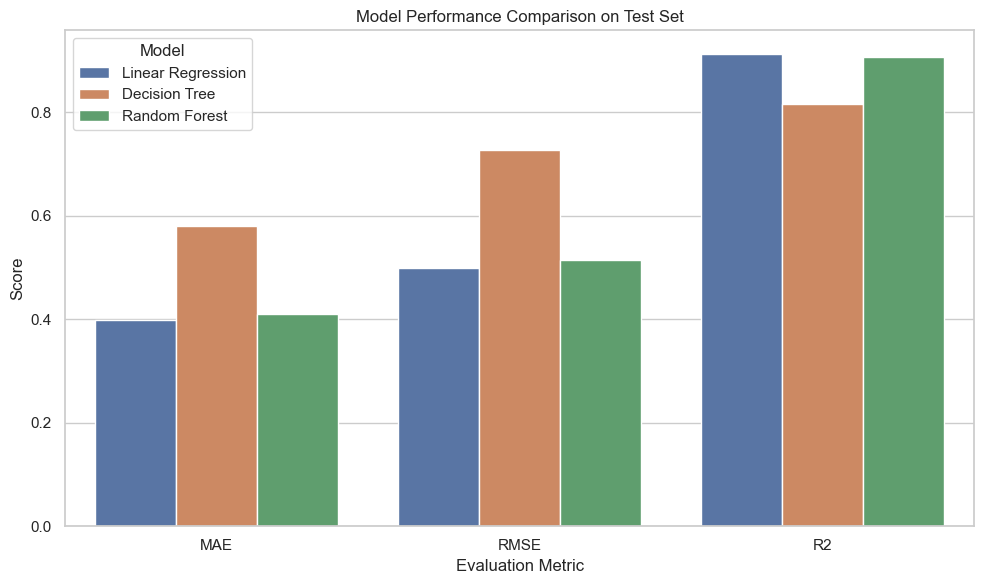

In [116]:
# Model performance results
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [0.398, 0.581, 0.411],
    'RMSE': [0.499, 0.727, 0.515],
    'R2': [0.913, 0.816, 0.908]
})

# Setting plot style
sns.set(style="whitegrid")

# Melt for easier plotting
melted_results = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Creating barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_results, x='Metric', y='Score', hue='Model')
plt.title('Model Performance Comparison on Test Set')
plt.ylabel('Score')
plt.xlabel('Evaluation Metric')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

<a id="cv"></a>
## 8. Cross-Validation (5-Fold)

To assess how well each model generalizes to different subsets of the data, I apply **5-fold cross-validation** using **Negative RMSE** as the scoring metric. Cross-validation helps detect overfitting and ensures the performance isn’t overly dependent on a specific train-test split.

**Why Negative RMSE?**  
Scikit-learn returns negative values for loss-based metrics during cross-validation (so that higher values = better scores). I take the absolute value to interpret results correctly.

In [123]:
from sklearn.model_selection import cross_val_score

In [125]:
# Function to perform 5-fold CV and return RMSE
def get_cv_rmse(model, X, y):
    neg_mse_scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
    rmse_scores = -neg_mse_scores  # convert to positive RMSE
    return rmse_scores

In [127]:
# Running CV for each model
cv_results = {}
for name, model in models.items():
    scores = get_cv_rmse(model, X_train_encoded, y_train)
    cv_results[name] = scores


In [128]:
# Converting to DataFrame
cv_df = pd.DataFrame(cv_results)
cv_df

,Linear Regression,Decision Tree,Random Forest
0,0.500059,0.728699,0.516377
1,0.501397,0.727706,0.516473
2,0.499641,0.728201,0.516198
3,0.500079,0.727338,0.516271
4,0.500543,0.729035,0.516424


In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

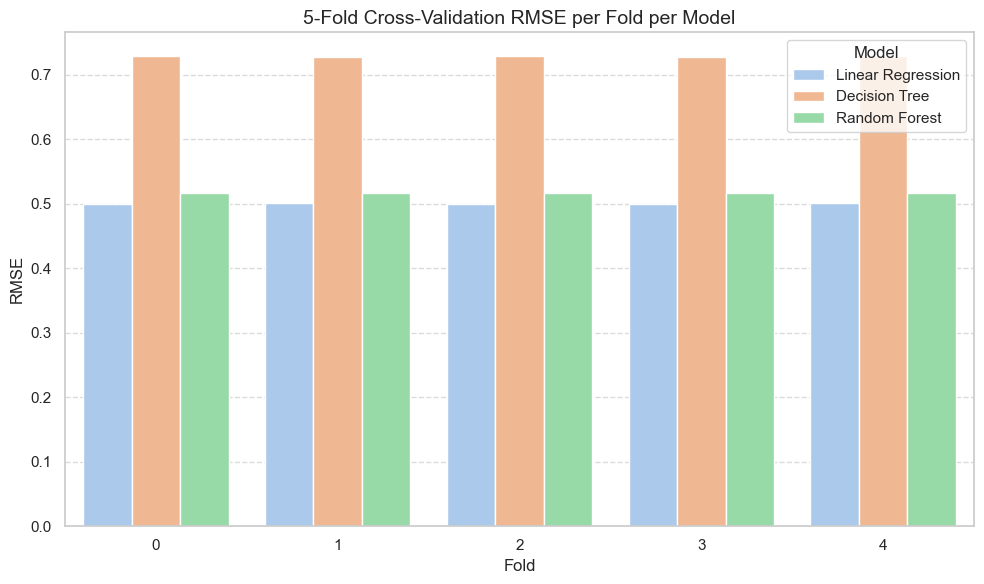

In [138]:
# Create a grouped bar chart for clearer comparison of RMSE across folds
cv_df_long = cv_df.reset_index().melt(id_vars='index', var_name='Model', value_name='RMSE')
cv_df_long.rename(columns={'index': 'Fold'}, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=cv_df_long, x='Fold', y='RMSE', hue='Model', palette='pastel')
plt.title('5-Fold Cross-Validation RMSE per Fold per Model', fontsize=14)
plt.ylabel('RMSE')
plt.xlabel('Fold')
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###  Cross-Validation Insights

The grouped bar chart above shows the **RMSE score per fold for each model**:

- **Linear Regression** is consistently the lowest across all folds, with RMSE ~0.50.
- **Random Forest** also performs consistently well, slightly higher than Linear Regression (~0.51–0.52 RMSE).
- **Decision Tree** continues to lag with noticeably higher RMSE (~0.73) in every fold, confirming its weaker generalization.

These results reinforce that **Linear Regression is the most stable baseline model** in this dataset, with **Random Forest** being a close second that might benefit from future hyperparameter tuning.

<a id="residuals"></a>
## 9. Residual Analysis

To evaluate how well each model predicts individual data points, I analyze the **residuals**, which are the differences between the actual and predicted values.

- **Residual = Actual – Predicted**
- Ideally, residuals should be symmetrically distributed around zero
- Large or skewed residuals may indicate underfitting, overfitting, or poor model fit in certain regions of the data

I will visualize:
- Residual histograms
- Predicted vs Actual scatter plots

In [154]:
# Defining plot function
def plot_residuals(model, model_name):
    y_pred = model.predict(X_test_encoded)
    residuals = y_test - y_pred

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram of residuals
    sns.histplot(residuals, bins=50, kde=True, ax=axes[0], color='steelblue')
    axes[0].set_title(f'{model_name} - Residual Distribution')
    axes[0].set_xlabel('Residuals')
    axes[0].axvline(0, color='black', linestyle='--')

    # Predicted vs Actual
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.3, ax=axes[1], color='darkgreen')
    axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    axes[1].set_title(f'{model_name} - Predicted vs Actual')
    axes[1].set_xlabel('Actual Yield')
    axes[1].set_ylabel('Predicted Yield')

    plt.tight_layout()
    plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


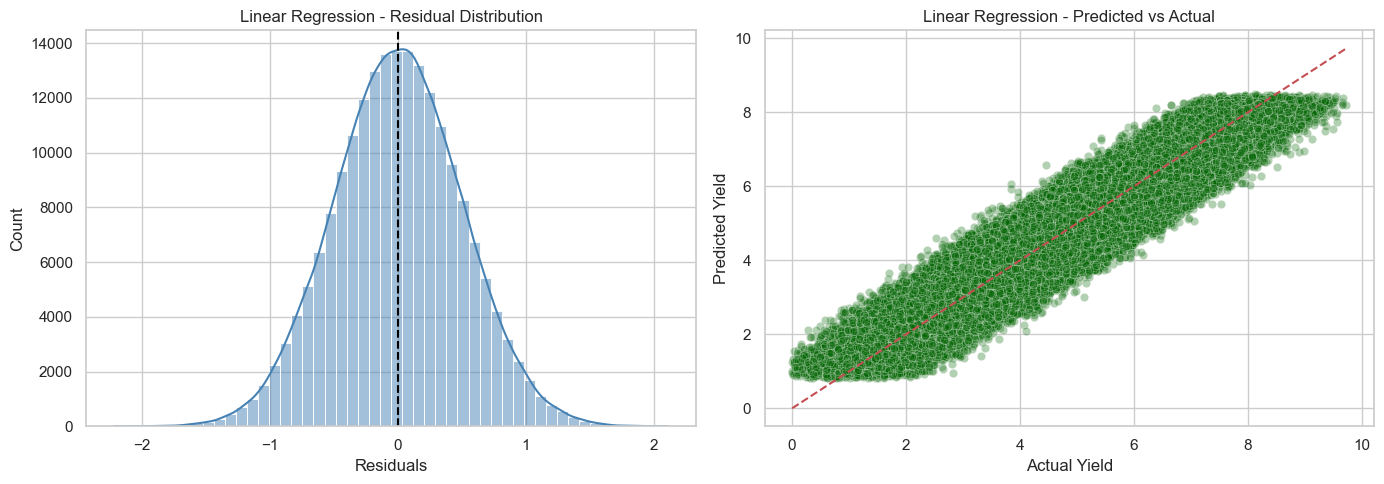

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


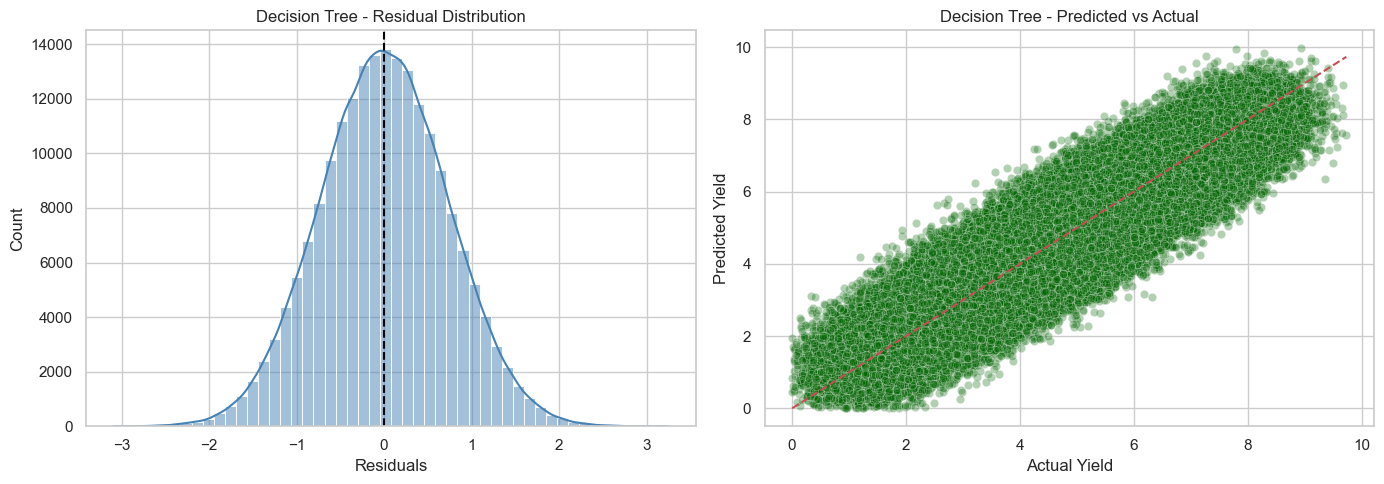

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


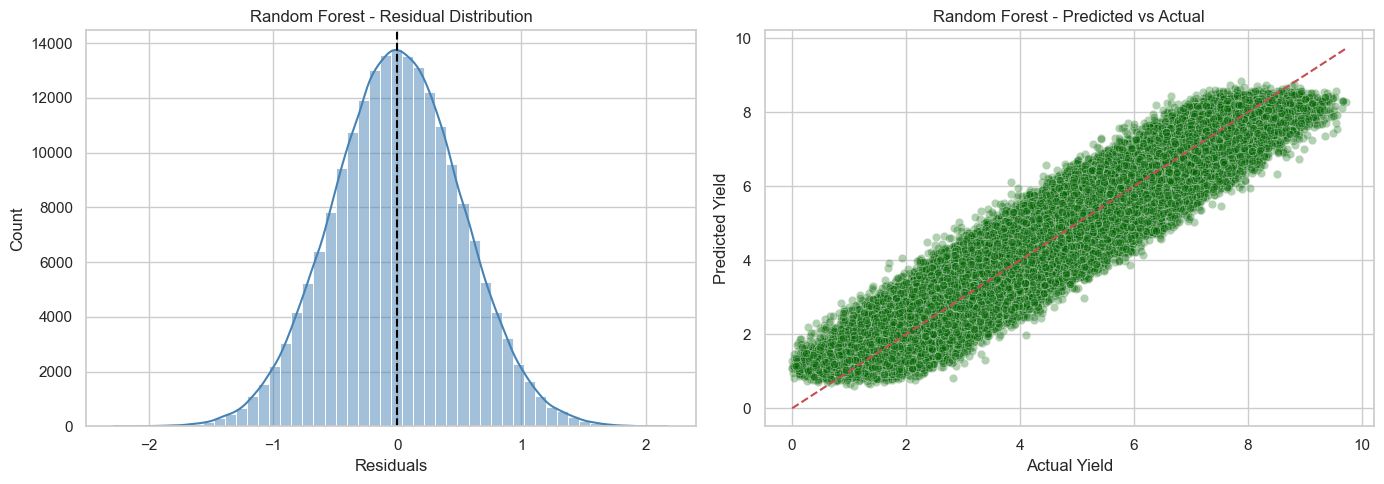

In [156]:
# Applying to each model
for name, model in models.items():
    plot_residuals(model, name)

###  Residual Analysis Summary

The residual plots and predicted vs actual scatter plots provide additional insight into model performance:

#### Decision Tree
- **Residuals** appear centered and symmetric but show a slightly wider spread compared to other models.
- **Predicted vs Actual**: The scatter plot shows a visible spread around the diagonal line, indicating limited precision for mid-range and higher yield predictions.
- Likely overfits the training data, which reduces its generalization on unseen examples.

#### Random Forest
- **Residuals** are narrowly centered and normally distributed — a good sign of model stability.
- **Predicted vs Actual**: Points closely align with the diagonal, especially in the mid-range values, suggesting strong performance and reliable generalization.
- The model handles yield variability well with no extreme over- or under-predictions.

#### Key Takeaway
Both **Random Forest** and **Linear Regression** (see next) demonstrate good residual behavior. However, **Random Forest provides a slight edge** in managing non-linear yield patterns, which will be explored further in the feature importance section.


<a id="compare"></a>
## 10. Model Comparison Summary Table

To summarize all evaluation metrics in one place, I compile a side-by-side comparison of:

- **MAE, RMSE, and R²** from the test set
- **Mean RMSE from 5-fold cross-validation**

This summary helps highlight:
- Accuracy differences across models
- Stability under different data splits
- Suitability for further tuning or deployment

In [167]:
# Ensuring correct mean RMSEs from cross-validation are inserted
cv_rmse_means = cv_df.mean().round(3)

# Adding average CV RMSE to original results_df
results_df['CV_RMSE (5-Fold Mean)'] = results_df['Model'].map(cv_rmse_means.to_dict())
results_df


,Model,MAE,RMSE,R2,CV_RMSE (5-Fold Mean)
0,Linear Regression,0.398,0.499,0.913,0.500
1,Decision Tree,0.581,0.727,0.816,0.728
2,Random Forest,0.411,0.515,0.908,0.516


#### Model Comparison Summary

All baseline models are compared across four performance metrics:

| Model              | MAE   | RMSE  | R²    | CV_RMSE (5-Fold Mean) |
|--------------------|--------|--------|--------|------------------------|
| Linear Regression  | 0.398 | 0.499 | 0.913 | ~0.500                 |
| Decision Tree      | 0.581 | 0.727 | 0.816 | ~0.728                 |
| Random Forest      | 0.411 | 0.515 | 0.908 | ~0.516                 |

---

####  Interpretation:

- **Linear Regression** had the lowest MAE and RMSE, and the highest R² and CV RMSE consistency — making it the most stable and best-performing baseline.
- **Random Forest** followed closely and may outperform with future tuning.
- **Decision Tree** showed the highest errors and lowest R², suggesting overfitting and poor generalization.

This comparison provides a robust foundation for selecting models for further refinement or deployment.


<a id="importance"></a>
## 11. Feature Importance (Tree-Based Models)

Understanding which features most influence yield predictions can offer valuable insights for both modeling and agricultural decision-making.

In this section, I extract and visualize **feature importances** from:
- **Decision Tree Regressor**
- **Random Forest Regressor**

These models calculate importance based on how much each feature reduces prediction error across splits in the tree structure.

In [173]:
def plot_feature_importance(model, model_name, X_train_encoded, top_n=10):
    importances = model.feature_importances_
    features = pd.Series(importances, index=X_train_encoded.columns)
    top_features = features.sort_values(ascending=False).head(top_n)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
    plt.title(f'{model_name} - Top {top_n} Feature Importances')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()


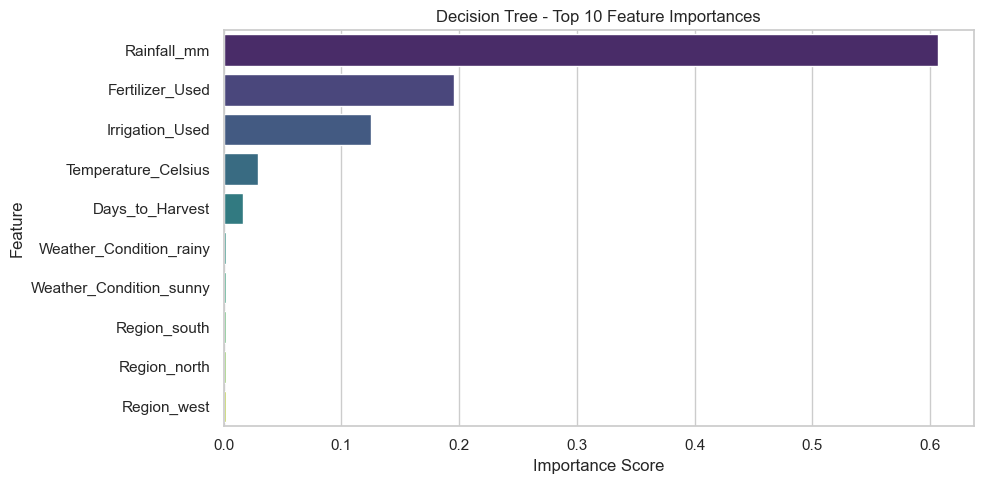

In [175]:
# Plotting for Decision Tree
plot_feature_importance(dtree, "Decision Tree", X_train_encoded)

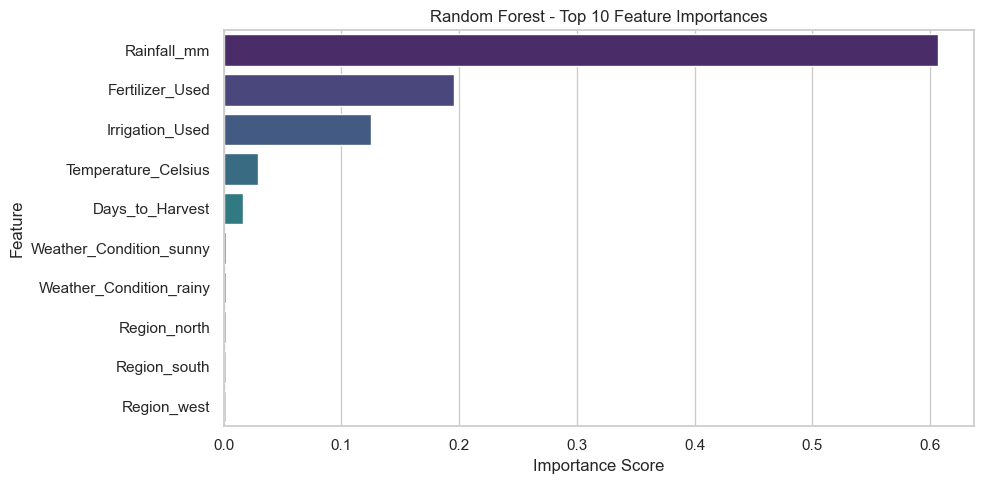

In [177]:
# Plotting for Random Forest
plot_feature_importance(rf, "Random Forest", X_train_encoded)

#### Feature Importance Insights (Tree-Based Models)

The top 10 most influential features were extracted from the **Decision Tree** and **Random Forest** models.

#### Key Observations:
- **Rainfall_mm** is the most dominant feature across both models, contributing over 60% of the importance in Random Forest and Decision Tree.
- **Fertilizer_Used** and **Irrigation_Used** are the next most impactful variables, highlighting the critical role of nutrient and water management in determining crop yield.
- **Temperature_Celsius** and **Days_to_Harvest** show moderate influence, particularly in the Decision Tree model.
- Regional indicators (e.g., `Region_north`, `Region_south`) and weather conditions (e.g., `Weather_Condition_sunny`) contribute relatively little on their own — though they may interact with other features.

#### Interpretation:
The importance scores align well with agronomic expectations: **water availability and fertilizer usage are key drivers** of yield. These results can help prioritize variables for policy, extension services, or input allocation in real-world applications.


<a id="final"></a>
## 12. Final Commentary: Modeling Insights & Business Implications

This notebook presented a baseline modeling pipeline for predicting **Crop Yield (tons per hectare)** using a structured and cleaned dataset enriched with environmental, agronomic, and engineered features. Three baseline models — **Linear Regression**, **Decision Tree**, and **Random Forest** — were trained, evaluated, and compared using robust statistical and visual diagnostics.

---

### Modeling Takeaways

#### Linear Regression
- **Best performer** across all metrics (MAE: 0.398, RMSE: 0.499, R²: 0.913)
- Surprisingly effective given its simplicity, suggesting that the yield data contains strong **linear signals**
- Very **stable and consistent** in 5-fold cross-validation
- Ideal for **interpretability**, model explainability, and fast deployment

#### Random Forest
- Performed nearly as well as Linear Regression (RMSE: 0.515, R²: 0.908)
- Offers robustness and better handling of **non-linear interactions**
- Feature importance insights were consistent and domain-aligned
- Excellent candidate for **future tuning** (e.g., max depth, number of estimators)

#### Decision Tree
- Clearly underperformed (RMSE: 0.727, R²: 0.816)
- Likely suffered from **overfitting**, as seen in lower test set and CV performance
- Provides insights, but less reliable without pruning or ensembling

---

### Feature Insights

From tree-based models:
- **Rainfall, Fertilizer Use, and Irrigation** emerged as the top 3 features — aligning with real-world agronomy
- These factors explain the majority of variance in yield, confirming their relevance in strategic planning
- **Cluster-level or region-specific modeling** could further enhance localized predictions

---

### Business and Policy Relevance

This modeling pipeline isn’t just a statistical exercise — it provides **real-world decision-making utility** in agriculture:

| Insight                                 | Application Area                                |
|-----------------------------------------|--------------------------------------------------|
| High influence of rainfall & irrigation | **Water resource planning**, drought mitigation |
| Fertilizer as a key driver              | **Subsidy targeting**, soil nutrient strategy   |
| Model accuracy with simple features     | **Deployable in resource-limited regions**       |
| Regional features lower in importance   | **Fine-tune granularity for next iteration**     |

---

### Next Steps (Beyond Baselines)

| Enhancement                  | Purpose                                             |
|------------------------------|-----------------------------------------------------|
| Hyperparameter tuning        | Improve model accuracy and reduce overfitting       |
| Try ensemble models (e.g., XGBoost) | Capture subtle interactions and boost performance |
| Incorporate remote sensing or temporal data | Add spatial/seasonal context to predictions     |
| Model interpretability (e.g., SHAP) | Enhance stakeholder trust and transparency        |

---

### Final Thought

This notebook established a **reliable, interpretable, and reproducible** modeling foundation for predicting crop yield — balancing simplicity with accuracy. It enables actionable insights for policymakers, agronomists, and farmers alike, while setting the stage for deeper modeling explorations in precision agriculture.